<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter7/svmquad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version
!rm svmcirc.csv
!wget https://raw.github.com/gnitnaw/Programs/master/Chapter7/svmcirc.csv

Python 3.7.12
--2022-03-05 21:44:16--  https://raw.github.com/gnitnaw/Programs/master/Chapter7/svmcirc.csv
Resolving raw.github.com (raw.github.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter7/svmcirc.csv [following]
--2022-03-05 21:44:17--  https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter7/svmcirc.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 994 [text/plain]
Saving to: ‘svmcirc.csv’

svmcirc.csv         100%[===================>]     994  --.-KB/s    in 0s      

2022-03-05 21:44:17 (49.6 MB/s) - ‘svmcir

# Example 7.6
## Import modules

In [2]:
import numpy as np
from numpy import genfromtxt
from sklearn.svm import SVC
import matplotlib.pyplot as plt
print(np.__version__)

1.21.5


## Set random seed

In [3]:
np.random.seed(12345)

## Original Program

In [4]:
data = genfromtxt('svmcirc.csv', delimiter=',') 
x = data[:,[0,1]] #vectors are rows
y = data[:,[2]].reshape(len(x),) #labels

tmp = np.sum(np.power(x,2),axis=1).reshape((len(x),1))
z = np.hstack((x,tmp))
  
clf = SVC(C = np.inf, kernel='linear')
clf.fit(z,y)

print("Support Vectors \n", clf.support_vectors_)
print("Support Vector Labels ",y[clf.support_])
print("Alpha ",clf.dual_coef_)
print("Bias ",clf.intercept_)

Support Vectors 
 [[ 0.038758    0.53796     0.29090314]
 [-0.49116    -0.20563     0.28352184]
 [-0.45068    -0.04797     0.20541358]
 [-0.061107   -0.41651     0.17721465]]
Support Vector Labels  [-1. -1.  1.  1.]
Alpha  [[ -46.49249413 -249.01807328  265.31805855   30.19250886]]
Bias  [5.617891]


## Reproduce Figure 7.9

[[ -0.91275548   0.89169513 -24.2763878 ]]
[5.617891]
[[ -46.49249413 -249.01807328  265.31805855   30.19250886]]


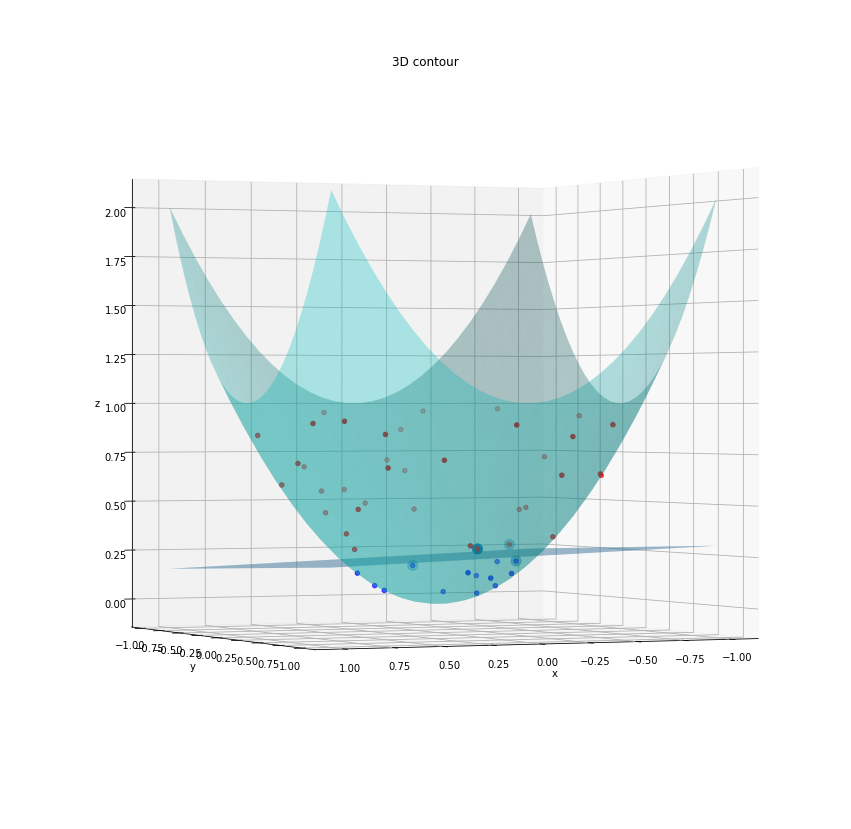

In [5]:
def f(xx, yy):
   return xx ** 2 + yy ** 2

xx = np.linspace(-1, 1, 30)
yy = np.linspace(-1, 1, 30)


X, Y = np.meshgrid(xx, yy)
Z = f(X, Y)

col=[]
for i in range(0,len(y)):
    if y[i]>0:
        col.append('b') 
    else:
        col.append('r') 

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.view_init(0,65)

#计算超平面方程wx+b=0
b=clf.intercept_
w=clf.coef_
print(w)
print(b)
print(clf.dual_coef_)

Z1= -w[0,0]/w[0,2]*X-w[0,1]/w[0,2]*Y-b[0]/w[0,2]

#绘制超平面,alpha为设置平面透明度
ax.plot_surface(X,Y,Z1,alpha=0.5)

ax.plot_surface(X,Y,Z,rstride=1,cstride=1,color='c',alpha=0.3,linewidth=0)
ax.scatter3D(x.T[0],x.T[1],tmp.T[0], c=col)
ax.scatter(clf.support_vectors_.T[0], clf.support_vectors_.T[1], clf.support_vectors_.T[2], 'm', s=100)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')

plt.show()


## Reproduce Figure 7.10

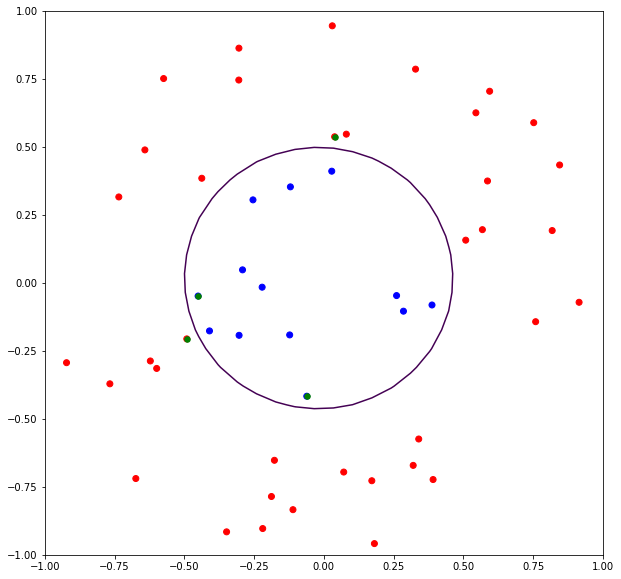

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(x.T[0],x.T[1],c=col)
C = b[0] + X * w[0][0] + Y * w[0][1] + Z* w[0][2]

plt.contour(X,Y,C,[0])
plt.scatter(clf.support_vectors_.T[0], clf.support_vectors_.T[1], c='g', s=30)
plt.show()

## svmkern.py

Support Vectors 
 [[ 0.038758  0.53796 ]
 [-0.49116  -0.20563 ]
 [ 0.50858   0.15759 ]
 [-0.43742   0.38537 ]
 [ 0.34015  -0.57397 ]
 [-0.45068  -0.04797 ]
 [-0.40977  -0.17625 ]
 [ 0.028401  0.41137 ]]
Support Vector Labels  [-1. -1. -1. -1. -1.  1.  1.  1.]
Nu [[ -7.79068185 -68.11518916  -1.51725004  -7.03376815  -0.57034285
   15.2489841   60.1202509    9.65799706]]
Bias  [-3.9763643]


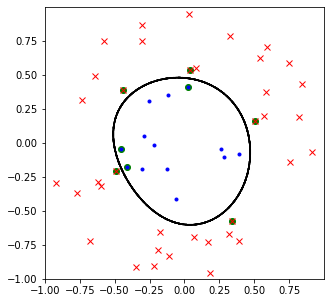

In [7]:
def mykernel(U,V):    
    tmpU = np.sum(np.power(U,2),axis=1).reshape((len(U),1))
    U = np.hstack((U,tmpU))
    tmpV = np.sum(np.power(V,2),axis=1).reshape((len(V),1))
    V = np.hstack((V,tmpV))
    K = U @ V.T
    print(K.shape)
    return K

# read in the data
inp = genfromtxt('svmcirc.csv', delimiter=',')
data = inp[:,[0,1]] #vectors are rows
y = inp[:,[2]].reshape(len(data),) #labels

#clf = SVC(C = np.inf, kernel=mykernel, gamma='auto')
clf = SVC(C = np.inf, kernel="rbf", gamma='scale')

clf.fit(data,y)


print("Support Vectors \n", clf.support_vectors_)
print("Support Vector Labels ",y[clf.support_])
print("Nu",clf.dual_coef_)
print("Bias ",clf.intercept_)

# plot
d = 0.001

fig = plt.figure(figsize=(5,5))

x_min, x_max = -1,1
y_min, y_max = -1,1
xx, yy = np.meshgrid(np.arange(x_min, x_max, d), np.arange(y_min, y_max, d))

plt.plot(data[clf.support_,0],data[clf.support_,1],'go')
plt.plot(data[y==1,0],data[y==1,1],'b.')
plt.plot(data[y==-1,0],data[y==-1,1],'rx')
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z,colors ="k")
plt.show()

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fig.savefig("rbf.pdf", bbox_inches='tight')
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%